## Imports and Dependencies

## Debugging: printing scenes and actions 

In [1]:
import r3d
import numpy as np
import open3d as o3d
import trimesh as tm

scene = r3d.Scene() 
position = np.array([0, 0, 1])
position_2 = np.array([-1, -2, 1])
test_box = r3d.create_box(position=position, length=1, width=1, height=1)
test_sphere = r3d.create_sphere(position=position_2, radius=0.5)
scene.add_body(test_box)
scene.add_body(test_sphere)
print(scene)


pybullet build time: Jun 12 2023 15:17:43


Scene ID: scene
Bodies:
    Body ID: box, Position: [0. 0. 1.]
    Body ID: sphere, Position: [1. 2. 1.]


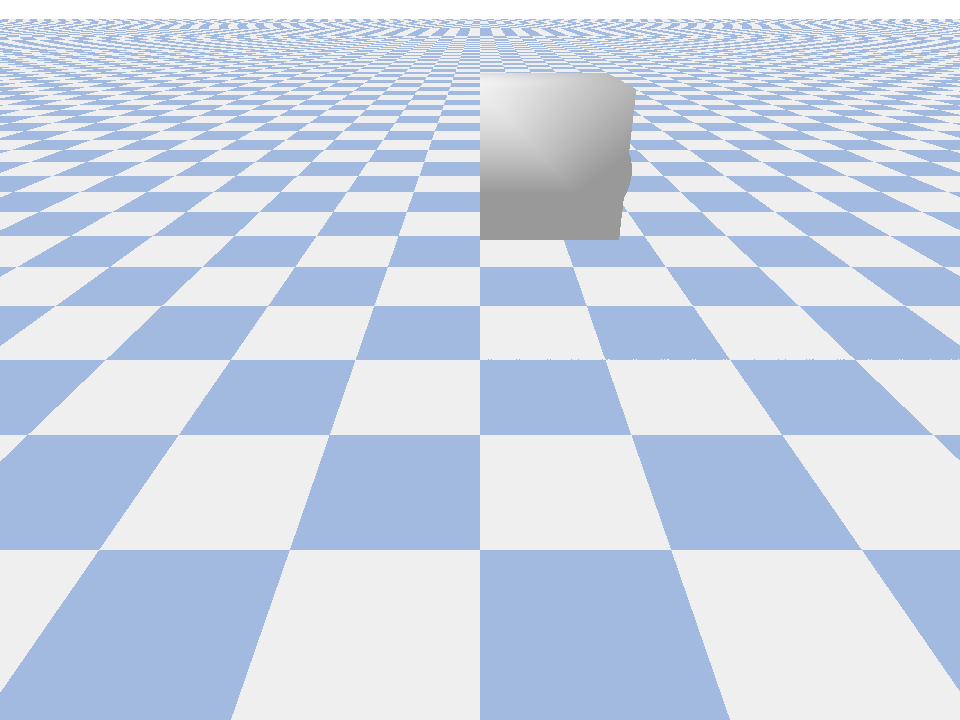

In [2]:
scene.render(r3d.pybullet_render)

## Creating a scene with Ball and Plane (show plane, background, camera pose) 

## Creating a scene with Ball and Cube (show orientation, position) 

## Creating a scene with custom mesh (custom mesh)

## Creating a scene with different transparency (alpha transparency)

## Editing Scenes: Checking Objects in Scene, Removing Objects from Scene, 

## Simple Simulation: Balls colliding (simulation, pybullet class)

## Simple Simulation: Balls Bouncing (restition, gravity) 

## Simple Simulation: Balls Rolling (friction, damping)

pybullet build time: Jun 12 2023 15:17:43
